<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Boosting)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

**Day2**

1. **[ADABoost](#ada)**

**Day3**

2. **[Gradient Boosting](#gb)**

**Day4**

3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from warnings import filterwarnings 
filterwarnings('ignore')

#### Load the csv file

In [4]:
df = pd.read_csv("emp_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


**Data Preparation**

In [5]:
df.describe()  # PerformanceRating is not useful columns because std is 0 then i drop taht columns 

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


In [6]:
df = df.drop('PerformanceRating',axis = 1)

In [7]:
df.shape

(1580, 17)

In [8]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
YearsAtCompany             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

**Remove the outlier using IQR method, if present.**

In [10]:
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes == object:
        cat_col.append(i)
    else:
        num_col.append(i)

In [11]:
num_col

['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'YearsAtCompany']

In [12]:
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime']

In [13]:
num_col = []
for i in df.select_dtypes(include = np.number):
    num_col.append(i)

In [14]:
num_col

['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'YearsAtCompany']

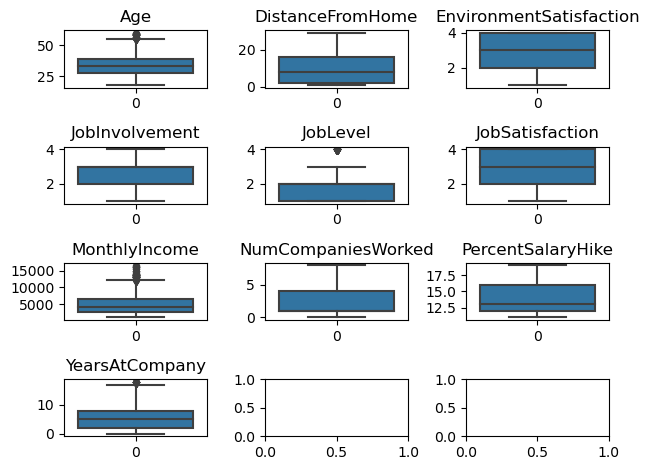

In [15]:
fig, ax = plt.subplots(4,3)
for variable, i in zip(num_col,ax.flatten()):
    boxplot = sns.boxplot(df[variable],ax = i)
    boxplot.set_title(variable)
    plt.tight_layout()
plt.show()

In [16]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)

IQR = Q3 - Q1

ll = Q1 - 1.5 * IQR
ul = Q3 + 1.5 * IQR

outlier_treat = df[~((df[num_col] < ll) | (df[num_col] > ul)).any(axis = 1)]

In [17]:
outlier_treat.shape

(1487, 17)

**Encode the categorical variables.**

In [18]:
df_cat = pd.get_dummies(df.select_dtypes(include = object),drop_first = True)

In [19]:
df_cat

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1576,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1577,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1578,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
new_df = pd.concat([df_cat,df[num_col]],axis = 1)

In [21]:
new_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany
0,1,1,0,1,0,1,0,0,0,0,...,33,3,1,3,1,1,3348,1,11,10
1,1,0,1,0,1,0,0,1,0,0,...,32,4,4,1,3,4,10400,1,11,14
2,1,0,1,1,0,1,0,0,0,0,...,40,9,4,3,1,1,2018,3,14,5
3,0,0,1,1,0,0,0,1,0,0,...,42,7,2,4,2,2,2372,6,16,1
4,0,1,0,1,0,1,0,0,0,0,...,43,27,3,3,3,1,10820,8,11,8


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_Yes                      1580 non-null   uint8
 1   BusinessTravel_Travel_Frequently   1580 non-null   uint8
 2   BusinessTravel_Travel_Rarely       1580 non-null   uint8
 3   Department_Research & Development  1580 non-null   uint8
 4   Department_Sales                   1580 non-null   uint8
 5   EducationField_Life Sciences       1580 non-null   uint8
 6   EducationField_Marketing           1580 non-null   uint8
 7   EducationField_Medical             1580 non-null   uint8
 8   EducationField_Other               1580 non-null   uint8
 9   EducationField_Technical Degree    1580 non-null   uint8
 10  Gender_Male                        1580 non-null   uint8
 11  JobRole_Human Resources            1580 non-null   uint8
 12  JobRole_Laboratory T

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
def age_convert_group(x):
    if x >= 18 and x <= 30 :
        return "18-30"
    elif x >= 31 and x <= 40 :
        return "31-40"
    elif x >= 41 and x <= 50 :
        return "41-50"
    elif x >= 51 and x <= 60 :
        return "51-60"

In [24]:
new_df['Age_Group'] = new_df['Age'].apply(age_convert_group)

In [25]:
new_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,Age_Group
0,1,1,0,1,0,1,0,0,0,0,...,3,1,3,1,1,3348,1,11,10,31-40
1,1,0,1,0,1,0,0,1,0,0,...,4,4,1,3,4,10400,1,11,14,31-40
2,1,0,1,1,0,1,0,0,0,0,...,9,4,3,1,1,2018,3,14,5,31-40
3,0,0,1,1,0,0,0,1,0,0,...,7,2,4,2,2,2372,6,16,1,41-50
4,0,1,0,1,0,1,0,0,0,0,...,27,3,3,3,1,10820,8,11,8,41-50


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
high_salary = new_df.groupby('Age_Group')['MonthlyIncome'].sum()

In [27]:
high_salary

Age_Group
18-30    1985927
31-40    3656637
41-50    1463484
51-60     726685
Name: MonthlyIncome, dtype: int64

In [28]:
high_salary.idxmax()

'31-40'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
new_df['Age_Group'].dtypes

dtype('O')

In [30]:
age_group = pd.get_dummies(new_df['Age_Group'], drop_first = True)

In [31]:
age_group_float = age_group.astype(float)

In [32]:
age_group_float

,31-40,41-50,51-60
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1575,0.0,0.0,0.0
1576,0.0,1.0,0.0
1577,0.0,0.0,0.0
1578,1.0,0.0,0.0


In [33]:
final_df = pd.concat([age_group_float,new_df], axis = 1)

In [34]:
final_df = final_df.drop('Age_Group', axis = 1)

In [35]:
final_df.head()

,31-40,41-50,51-60,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany
0,1.0,0.0,0.0,1,1,0,1,0,1,0,...,33,3,1,3,1,1,3348,1,11,10
1,1.0,0.0,0.0,1,0,1,0,1,0,0,...,32,4,4,1,3,4,10400,1,11,14
2,1.0,0.0,0.0,1,0,1,1,0,1,0,...,40,9,4,3,1,1,2018,3,14,5
3,0.0,1.0,0.0,0,0,1,1,0,0,0,...,42,7,2,4,2,2,2372,6,16,1
4,0.0,1.0,0.0,0,1,0,1,0,1,0,...,43,27,3,3,3,1,10820,8,11,8


In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   31-40                              1580 non-null   float64
 1   41-50                              1580 non-null   float64
 2   51-60                              1580 non-null   float64
 3   Attrition_Yes                      1580 non-null   uint8  
 4   BusinessTravel_Travel_Frequently   1580 non-null   uint8  
 5   BusinessTravel_Travel_Rarely       1580 non-null   uint8  
 6   Department_Research & Development  1580 non-null   uint8  
 7   Department_Sales                   1580 non-null   uint8  
 8   EducationField_Life Sciences       1580 non-null   uint8  
 9   EducationField_Marketing           1580 non-null   uint8  
 10  EducationField_Medical             1580 non-null   uint8  
 11  EducationField_Other               1580 non-null   uint8

<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df_cat.columns

Index(['Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_Yes'],
      dtype='object')

In [36]:
X = final_df[['BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_Yes']]
y = final_df['Attrition_Yes']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1106, 19) (474, 19) (1106,) (474,)


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_classification = AdaBoostClassifier(n_estimators=40, random_state=10)

ada_model = ada_classification.fit(X_train,y_train)
ada_model 

AdaBoostClassifier(n_estimators=40, random_state=10)

In [41]:
def performance(model,x,y):  # HERE I AM USING FUNCTION TO PRINT CONFUTION MATRIX AND CLASSIFICATION REPORT
    y_pred = model.predict(x)
    print("Confusion Matrix")
    cm = confusion_matrix(y,y_pred)
    print(cm)
    print("Classifiaction Report")
    print(classification_report(y,y_pred))

In [40]:
performance(ada_model, X_train, y_train)

Confusion Matrix
[[490 125]
 [199 292]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       615
           1       0.70      0.59      0.64       491

    accuracy                           0.71      1106
   macro avg       0.71      0.70      0.70      1106
weighted avg       0.71      0.71      0.70      1106



In [41]:
performance(ada_model, X_test, y_test)

Confusion Matrix
[[194  71]
 [ 86 123]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       265
           1       0.63      0.59      0.61       209

    accuracy                           0.67       474
   macro avg       0.66      0.66      0.66       474
weighted avg       0.67      0.67      0.67       474



In [42]:
# Model is overfiting because train accuracy is high when test accuracy is low.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
X = final_df.drop('Attrition_Yes', axis = 1)
y = final_df['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1106, 32) (474, 32) (1106,) (474,)


In [44]:
final_df.head()

,31-40,41-50,51-60,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany
0,1.0,0.0,0.0,1,1,0,1,0,1,0,...,33,3,1,3,1,1,3348,1,11,10
1,1.0,0.0,0.0,1,0,1,0,1,0,0,...,32,4,4,1,3,4,10400,1,11,14
2,1.0,0.0,0.0,1,0,1,1,0,1,0,...,40,9,4,3,1,1,2018,3,14,5
3,0.0,1.0,0.0,0,0,1,1,0,0,0,...,42,7,2,4,2,2,2372,6,16,1
4,0.0,1.0,0.0,0,1,0,1,0,1,0,...,43,27,3,3,3,1,10820,8,11,8


In [45]:
final_df.columns

Index(['31-40', '41-50', '51-60', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'YearsAtCompany'],
      dtype='object')

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada_classification = AdaBoostClassifier(n_estimators=40, random_state=10)

ada_model = ada_classification.fit(X_train,y_train)
ada_model 

AdaBoostClassifier(n_estimators=40, random_state=10)

In [47]:
performance(ada_model, X_train, y_train)

Confusion Matrix
[[516  99]
 [103 388]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       615
           1       0.80      0.79      0.79       491

    accuracy                           0.82      1106
   macro avg       0.82      0.81      0.81      1106
weighted avg       0.82      0.82      0.82      1106



In [48]:
performance(ada_model, X_test, y_test)

Confusion Matrix
[[205  60]
 [ 51 158]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       265
           1       0.72      0.76      0.74       209

    accuracy                           0.77       474
   macro avg       0.76      0.76      0.76       474
weighted avg       0.77      0.77      0.77       474



In [49]:
# Model is overfiting because train accuracy is high when test accuracy is low.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def roc_plot(model, X, y, label):
    # Predict probabilities for the positive class
    y_pred = model.predict_proba(X)[:, 1]
    # Compute ROC curve values
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    # Calculate AUC score
    auc_score = roc_auc_score(y, y_pred)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC Score = {auc_score:.4f})')
    # Set limits for X and Y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # Plot the diagonal line representing random chance
    plt.plot([0, 1], [0, 1], 'r--')
    # Add plot and axes labels
    plt.title('ROC Curve', fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
    # Set the position of the legend
    plt.legend(loc='lower right')
    # Plot the grid
    plt.grid(True)
    # Show the plot

# Example usage:
# roc_plot(your_model, X_test, y_test, 'Your Model Name')

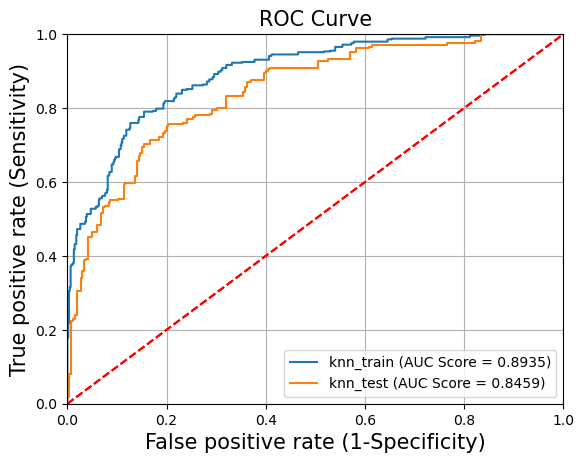

In [51]:
roc_plot(ada_model,X_train,y_train,'Adaboost_train')
roc_plot(ada_model,X_test,y_test,'Adaboost_test')

In [52]:
# Model is Best fit because train accuracy and test accuracy not high difference.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[205  60]
 [ 51 158]]


<Axes: >

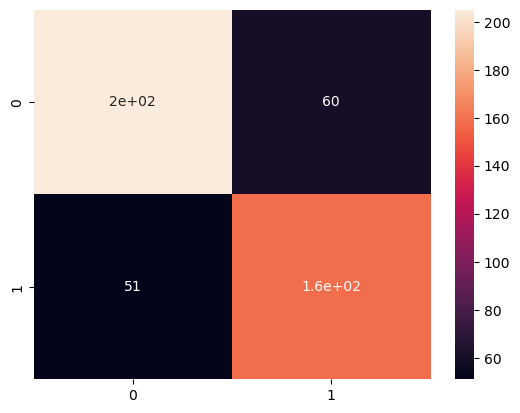

In [53]:
from sklearn.metrics import confusion_matrix
y_pred = ada_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
total = TN + FP + FN + TP  # np.sum(cm)

In [55]:
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
correct_classified = (TP + TN) / np.sum(cm)
misclassified = (FP + FN) / total
print("specificity :",specificity)
print("sensitivity :",sensitivity)
print("correct_classified :",correct_classified)
print("misclassified :",misclassified)

specificity : 0.7735849056603774
sensitivity : 0.7559808612440191
correct_classified : 0.7658227848101266
misclassified : 0.23417721518987342


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [56]:
%%time
from sklearn.model_selection import GridSearchCV
tunning_parameteres = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                       'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

Adclassifier = AdaBoostClassifier()

Adclassifier_grid = GridSearchCV(estimator=Adclassifier, param_grid= tunning_parameteres,cv = 5)

Adclassifier_grid.fit(X_train, y_train)

print("Best parameters for  AdaBoosting classification :", Adclassifier_grid.best_params_, '\n')

Best parameters for Gradient Boosting classification : {'learning_rate': 0.15, 'n_estimators': 300} 

CPU times: total: 2min 53s
Wall time: 3min 3s


In [58]:
Adaclassifier = AdaBoostClassifier(**Adclassifier_grid.best_params_, random_state=10)
Ada_model = Adaclassifier.fit(X_train,y_train)
Ada_model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [59]:
performance(Ada_model,X_train,y_train)

Confusion Matrix
[[521  94]
 [123 368]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       615
           1       0.80      0.75      0.77       491

    accuracy                           0.80      1106
   macro avg       0.80      0.80      0.80      1106
weighted avg       0.80      0.80      0.80      1106



In [60]:
performance(Ada_model,X_test,y_test)

Confusion Matrix
[[212  53]
 [ 56 153]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       265
           1       0.74      0.73      0.74       209

    accuracy                           0.77       474
   macro avg       0.77      0.77      0.77       474
weighted avg       0.77      0.77      0.77       474



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Here i used CROSSVALIDATION because parameters already tuned so using that parameters check it is give best accuracy when we use cv = 10 it is check for 10 time and give accuracy that is the mean of cross validation. 

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
adaboost_classifier_tuned = AdaBoostClassifier(n_estimators=300,
                                               learning_rate=0.15,
                                               random_state=23)

# Perform 10-fold cross-validation

roc_auc_scores = cross_val_score(adaboost_classifier_tuned,X_train, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = roc_auc_scores.mean()

# Print the result
print("Average AUC-ROC score is : ",average_roc_auc.round())

Average AUC-ROC score is :  1.0


<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> (Day 3 - Gradient Boost)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbsoot_model = GradientBoostingClassifier(n_estimators=100,max_depth=3, random_state=10)
gboost_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [49]:
performance(gboost_model,X_train,y_train)

Confusion Matrix
[[584  31]
 [ 49 442]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       615
           1       0.93      0.90      0.92       491

    accuracy                           0.93      1106
   macro avg       0.93      0.92      0.93      1106
weighted avg       0.93      0.93      0.93      1106



In [50]:
performance(gboost_model,X_test,y_test)

Confusion Matrix
[[220  45]
 [ 34 175]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       265
           1       0.80      0.84      0.82       209

    accuracy                           0.83       474
   macro avg       0.83      0.83      0.83       474
weighted avg       0.83      0.83      0.83       474



In [51]:
# Model is overfit because train and test data accuracy difference is high. Apply hyperparameters tunned i can get best accuracy.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [58]:
from sklearn.model_selection import GridSearchCV
tunned_parameters = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth' : [2, 3, 4, 5, 6]}

gboost_classifier = GradientBoostingClassifier()

gscv_gboost = GridSearchCV(estimator = gboost_classifier,param_grid = tunned_parameters, cv = 5)

gscv_gboost.fit(X_train,y_train)

print("Best parameters Gradient Boosting classifier :",gscv_gboost.best_params_)

Best parameters Gradient Boosting classifier : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250}


In [60]:
gboost_classifier = GradientBoostingClassifier(**gscv_gboost.best_params_, random_state = 10)
gboost_model_final = gboost_classifier.fit(X_train,y_train)
gboost_model_final.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [61]:
performance(gboost_model_final,X_train,y_train)

Confusion Matrix
[[615   0]
 [  0 491]]
Classifiaction Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       491

    accuracy                           1.00      1106
   macro avg       1.00      1.00      1.00      1106
weighted avg       1.00      1.00      1.00      1106



In [62]:
performance(gboost_model_final,X_test,y_test)

Confusion Matrix
[[243  22]
 [  7 202]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       265
           1       0.90      0.97      0.93       209

    accuracy                           0.94       474
   macro avg       0.94      0.94      0.94       474
weighted avg       0.94      0.94      0.94       474



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

* I already built gradient boosting model in previous question and classification report.
* So gradient boosting model Train accuracy is 1.00 and Test accuracy is 0.94 - conclude that model is overfit.

In [84]:
from sklearn.ensemble import AdaBoostClassifier
Ada_classifier = AdaBoostClassifier()
Ada_model = Ada_classifier.fit(X_train,y_train)
Ada_model

AdaBoostClassifier()

In [85]:
performance(Ada_model,X_train,y_train)

Confusion Matrix
[[517  98]
 [108 383]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       615
           1       0.80      0.78      0.79       491

    accuracy                           0.81      1106
   macro avg       0.81      0.81      0.81      1106
weighted avg       0.81      0.81      0.81      1106



In [87]:
performance(Ada_model,X_test,y_test)

Confusion Matrix
[[204  61]
 [ 52 157]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       265
           1       0.72      0.75      0.74       209

    accuracy                           0.76       474
   macro avg       0.76      0.76      0.76       474
weighted avg       0.76      0.76      0.76       474



* AdaBoostClassifier model performe well on train and test data so model is best fit.

* CONCLUTION : - I build 2 model GradientBoostingClassifier and AdaBoost model from this two model my best fit model is GradientBoostingClassifier

* Because GradientBoostingClassifier model perform well on train and test data set compare to AdaBoost model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

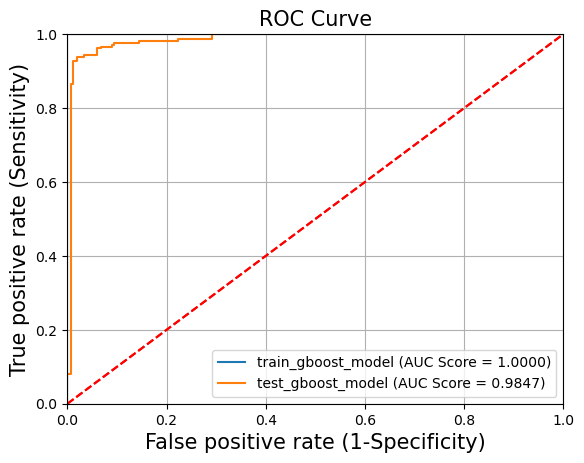

In [81]:
roc_plot(gboost_model,X_train,y_train,"train_gboost_model")
roc_plot(gboost_model,X_test,y_test,"test_gboost_model")

<Axes: >

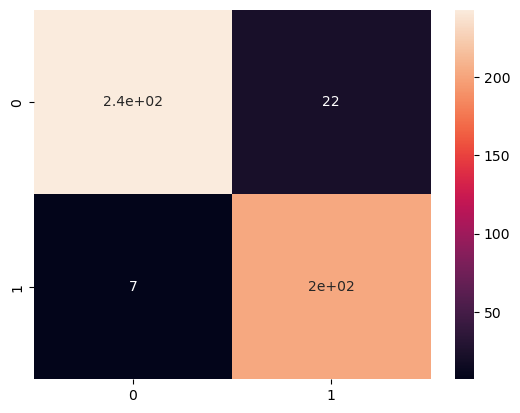

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = gboost_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> (Day 4 - XG Boost)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(learning_rate = 0.01, gamma = 2, random_state = 10)
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [66]:
performance(xgboost_model,X_train,y_train)

Confusion Matrix
[[588  27]
 [ 68 423]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       615
           1       0.94      0.86      0.90       491

    accuracy                           0.91      1106
   macro avg       0.92      0.91      0.91      1106
weighted avg       0.92      0.91      0.91      1106



In [67]:
performance(xgboost_model,X_test,y_test)

Confusion Matrix
[[234  31]
 [ 53 156]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       265
           1       0.83      0.75      0.79       209

    accuracy                           0.82       474
   macro avg       0.82      0.81      0.82       474
weighted avg       0.82      0.82      0.82       474



In [68]:
# Model is best fit because train and test accuracy is difference is 0.9 and improve prtformance of using hyperparameters tunned.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [70]:
%%time
from sklearn.model_selection import GridSearchCV
tunned_parameters = {'n_estimators' : [100, 120, 150],
                    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
                    'gamma' : [2, 3, 4, 5, 6],
                    'max_depth' : [2, 3, 4, 5, 6]}

xgboost_model = XGBClassifier()

xgboost_model_grcv = GridSearchCV(estimator=xgboost_model, param_grid= tunned_parameters, cv = 5)
xgboost_model_grcv.fit(X_train,y_train)

print("Best parameteres for XGBoost Classifier :",xgboost_model_grcv.best_params_)

Best parameteres for XGBoost Classifier : {'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}
CPU times: total: 45min 6s
Wall time: 6min 24s


In [73]:
xgboost_classifier= XGBClassifier(**xgboost_model_grcv.best_params_, random_state = 10)
xgboost_model = xgboost_classifier.fit(X_train,y_train)
xgboost_model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [74]:
performance(xgboost_model,X_train,y_train)

Confusion Matrix
[[597  18]
 [ 12 479]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       615
           1       0.96      0.98      0.97       491

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106



In [75]:
performance(xgboost_model,X_test,y_test)

Confusion Matrix
[[233  32]
 [ 23 186]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       265
           1       0.85      0.89      0.87       209

    accuracy                           0.88       474
   macro avg       0.88      0.88      0.88       474
weighted avg       0.89      0.88      0.88       474



In [ ]:
# Model is best fit because train and test accuracy is difference is 0.9 and improve prtformance of using hyperparameters tunned.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[233  32]
 [ 23 186]]


<Axes: >

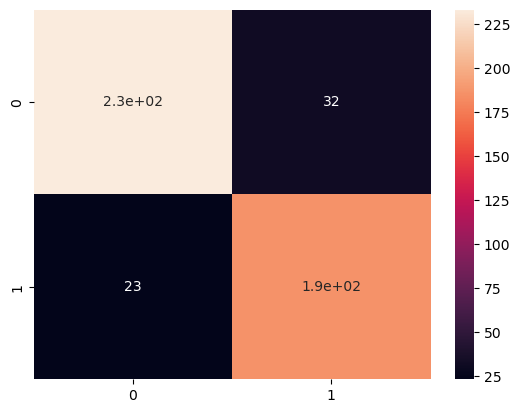

In [77]:
from sklearn.metrics import confusion_matrix
y_pred = xgboost_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

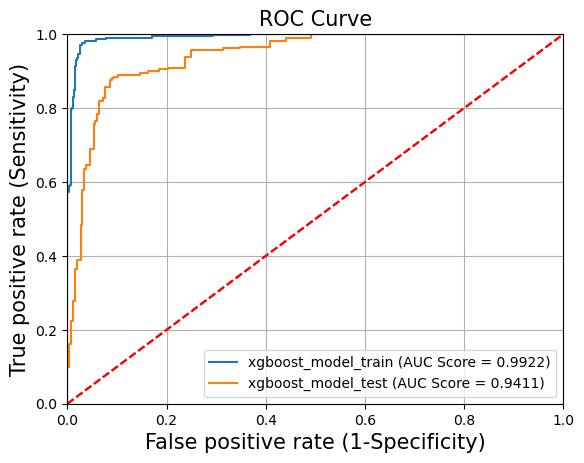

In [80]:
roc_plot(xgboost_model,X_train,y_train,'xgboost_model_train')
roc_plot(xgboost_model,X_test,y_test,'xgboost_model_test')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

base_learners = [('Decision Tree',DecisionTreeClassifier()),  # I can pass multiple hyper parameters inside model name()
                 ('Random Forest',RandomForestClassifier())]

stack_model_adaboost_19 = StackingClassifier(estimators = base_learners, final_estimator= AdaBoostClassifier())  # I can pass multiple hyper parameters inside model name()
stack_model_adaboost_19.fit(X_train,y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier())

In [71]:
performance(stack_model_adaboost_19,X_train,y_train)

Confusion Matrix
[[615   0]
 [  4 487]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       615
           1       1.00      0.99      1.00       491

    accuracy                           1.00      1106
   macro avg       1.00      1.00      1.00      1106
weighted avg       1.00      1.00      1.00      1106



In [72]:
performance(stack_model_adaboost_19,X_test,y_test)

Confusion Matrix
[[259   6]
 [ 19 190]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       265
           1       0.97      0.91      0.94       209

    accuracy                           0.95       474
   macro avg       0.95      0.94      0.95       474
weighted avg       0.95      0.95      0.95       474



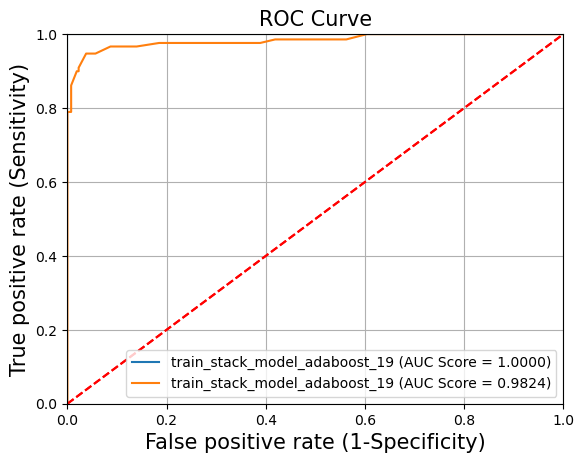

In [76]:
roc_plot(stack_model_adaboost_19,X_train,y_train,'train_stack_model_adaboost_19')
roc_plot(stack_model_adaboost_19,X_test,y_test,'train_stack_model_adaboost_19')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

base_learners = [('Decision Tree',DecisionTreeClassifier()),  # I can pass multiple hyper parameters inside model name()
                 ('Random Forest',RandomForestClassifier())]

stack_model_gbboost_20 = StackingClassifier(estimators = base_learners, final_estimator= GradientBoostingClassifier())  # I can pass multiple hyper parameters inside model name()
stack_model_gbboost_20.fit(X_train,y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [82]:
performance(stack_model_gbboost_20,X_train,y_train)

Confusion Matrix
[[615   0]
 [  4 487]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       615
           1       1.00      0.99      1.00       491

    accuracy                           1.00      1106
   macro avg       1.00      1.00      1.00      1106
weighted avg       1.00      1.00      1.00      1106



In [84]:
performance(stack_model_gbboost_20,X_test,y_test)

Confusion Matrix
[[256   9]
 [ 21 188]]
Classifiaction Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       265
           1       0.95      0.90      0.93       209

    accuracy                           0.94       474
   macro avg       0.94      0.93      0.94       474
weighted avg       0.94      0.94      0.94       474



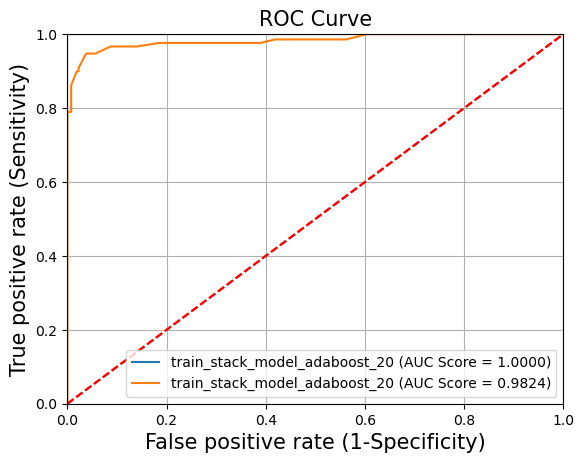

In [80]:
roc_plot(stack_model_adaboost_19,X_train,y_train,'train_stack_model_adaboost_20')
roc_plot(stack_model_adaboost_19,X_test,y_test,'train_stack_model_adaboost_20')